In [1]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
from natsort import natsorted
import os
from glob import glob


In [2]:
path_to_grey_img = r"data\image"
path_to_grey_seg = r"data\segment"
path_to_replica_angles = r"3dTo2d\realAngles"

imgs = natsorted(glob(os.path.join(path_to_grey_img, "IMG*.tiff")))
segs = natsorted(glob(os.path.join(path_to_grey_seg, "I*.tiff")))
imgs2 = natsorted(glob(os.path.join(path_to_replica_angles, "*.png")))


In [3]:
print(imgs,segs)

['data\\image\\IMG00000_21.tiff', 'data\\image\\IMG00001_16.tiff', 'data\\image\\IMG00003_23.tiff', 'data\\image\\IMG00004_21.tiff', 'data\\image\\IMG00006_31.tiff', 'data\\image\\IMG00007_23.tiff', 'data\\image\\IMG00008_21.tiff'] ['data\\segment\\I0_021.tiff', 'data\\segment\\I1_016.tiff', 'data\\segment\\I3_023.tiff', 'data\\segment\\I4_021.tiff', 'data\\segment\\I6_031.tiff', 'data\\segment\\I7_023.tiff', 'data\\segment\\I8_021.tiff']


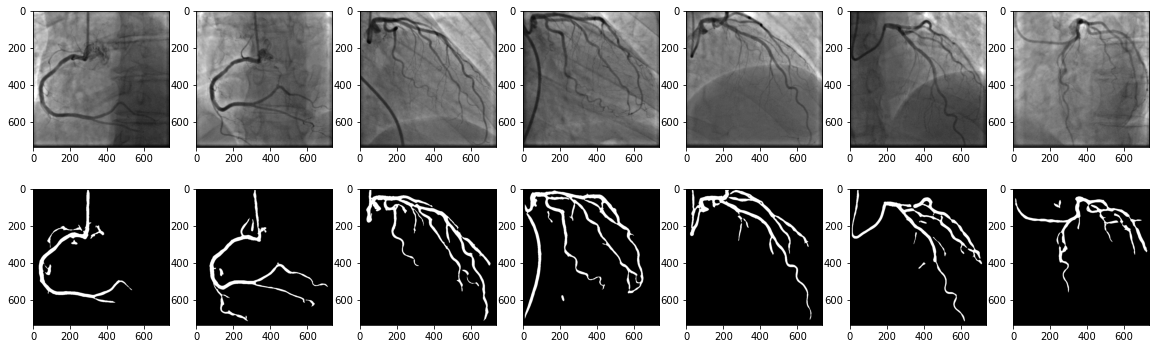

In [4]:
plt.figure(figsize=(20,6))


for i in range(len(imgs)):
  plt.subplot(2,7,i+1)
  img = cv2.imread(imgs[i],0)
  plt.imshow(img,cmap="gray")

  plt.subplot(2, 7, 8+i)
  img2 = cv2.imread(segs[i], 0)
  plt.imshow(img2, cmap="gray")

plt.show()

In [5]:
print(imgs2)

['3dTo2d\\realAngles\\0_-30.7_0.7.png', '3dTo2d\\realAngles\\1_11_20.png', '3dTo2d\\realAngles\\3_-31_-0.1.png', '3dTo2d\\realAngles\\4_-21.5_-24.8.png', '3dTo2d\\realAngles\\6_-24.5_27.3.png', '3dTo2d\\realAngles\\7_0.1_36.7.png', '3dTo2d\\realAngles\\8_49.5_1.3.png']


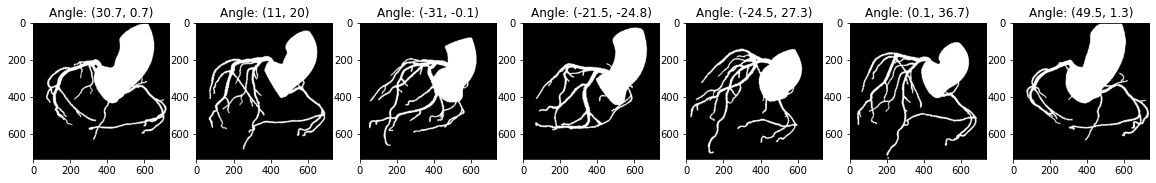

In [6]:
plt.figure(figsize=(20, 3))

angles = [(30.7, 0.7), (11, 20), (-31, -0.1), (-21.5, -24.8),
          (-24.5, 27.3), (0.1, 36.7), (49.5, 1.3)]

for i in range(len(imgs2)):
  plt.subplot(1, 7, i+1)
  plt.title("Angle: " + str(angles[i]))
  img = cv2.imread(imgs2[i], 0)
  plt.imshow(img, cmap="gray")

plt.show()


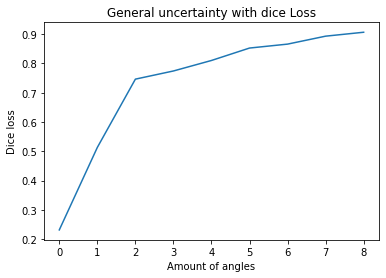

In [7]:
#dice plot
dice_loss = [0.23177,0.5132,0.74615,0.77401,0.80985,0.85222,0.86565,0.89276,0.90614]
plt.title("General uncertainty with dice Loss")
plt.xlabel("Amount of angles")
plt.ylabel("Dice loss")
plt.plot(dice_loss)
plt.show()


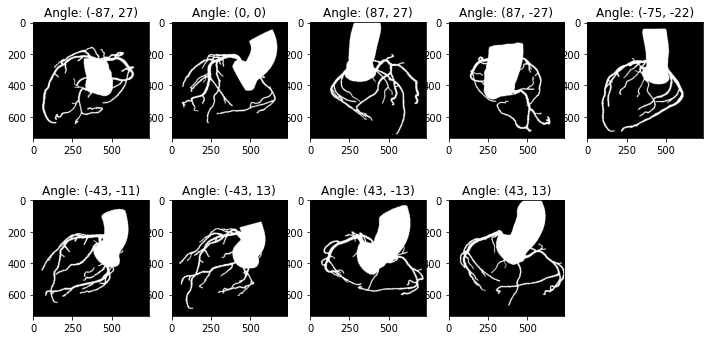

In [8]:
#uncertainty angles:
path_to_total = r"3dTo2d\totalUncertancy"

imgs3 = natsorted(glob(os.path.join(path_to_total, "*.png")))

plt.figure(figsize=(12, 6))

angles = [(-87, 27), (0, 0), (87, 27), (87, -27), (-75, -22),
          (-43, -11), (-43, 13), (43, -13), (43, 13)]

for i in range(len(imgs3)):
  plt.subplot(2, 5, i+1)


  plt.title("Angle: " + str(angles[i]))
  img = cv2.imread(imgs3[i], 0)
  plt.imshow(img, cmap="gray")

plt.show()


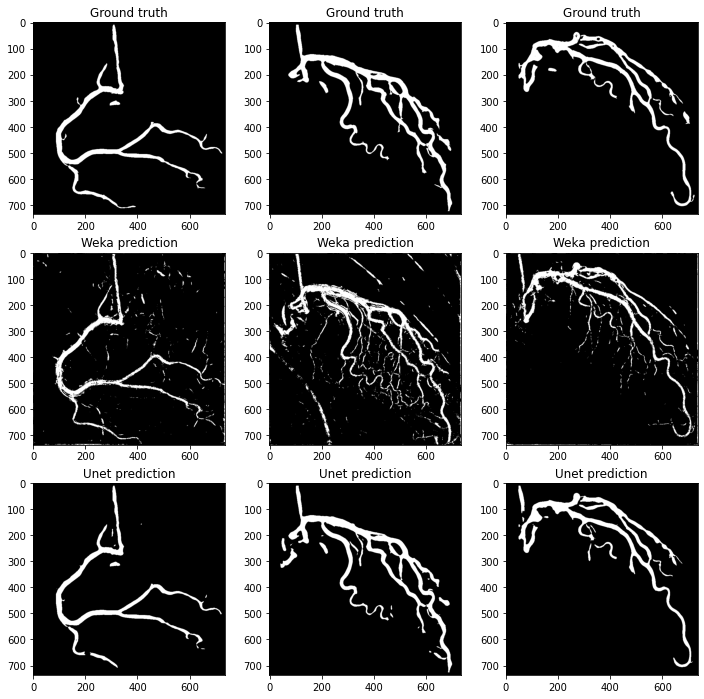

In [9]:
#show some weka and unet examples
p_ground = r"weka\ground"
p_weka = r"weka\wekaOut"
p_unet = r"testSegmentations"

img_g = natsorted(glob(os.path.join(p_ground, "*.tiff")))
img_w = natsorted(glob(os.path.join(p_weka, "*.tif")))
img_u = natsorted(glob(os.path.join(p_unet, "*.png")))

intrest = [9,15,29]

plt.figure(figsize=(12, 12))


for i in range(len(intrest)):
  plt.subplot(3, 3, i+1)
  plt.title("Ground truth")
  imgG = cv2.imread(img_g[intrest[i]], 0)
  plt.imshow(imgG, cmap="gray")

  plt.subplot(3, 3, i+1+3)
  plt.title("Weka prediction")
  imgW = cv2.imread(img_w[intrest[i]], 0)
  plt.imshow(imgW, cmap="gray")

  plt.subplot(3, 3, i+1+6)
  plt.title("Unet prediction")
  imgU = cv2.imread(img_u[intrest[i]], 0)
  plt.imshow(imgU, cmap="gray")

plt.show()
